In [34]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
new_features = ['xmax','xmin', 'ymax', 'ymin','Space_after', 'Space_before','Word_info','Offset_number','Word_length']




/home/tinu/.pyenv/versions/3.6.5/envs/env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


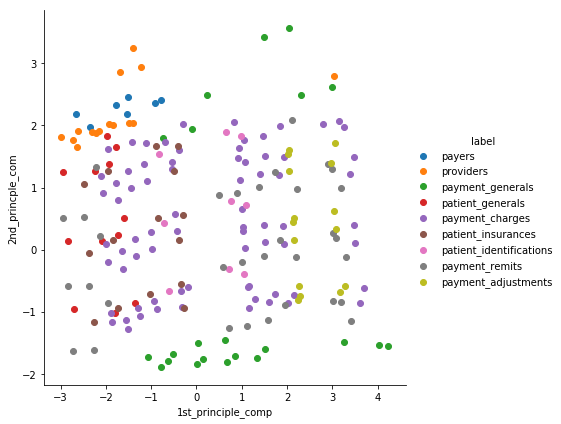

In [54]:
doc_data = pd.read_csv('document_data.csv',sep='\t')
doc_data = doc_data[0:400]
std_data = StandardScaler().fit_transform(X=doc_data[new_features])
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(std_data)
pca_data = np.vstack((pca_data.T,doc_data['collection_name'])).T
pca_data_df = pd.DataFrame(pca_data,columns=('1st_principle_comp','2nd_princple_com','label'))
sn.FacetGrid(pca_data_df,hue='label',size=6).map(plt.scatter,'1st_principle_comp','2nd_princple_com').add_legend()
plt.show()


In [55]:
model = TSNE(n_components=2,perplexity=50)
tsne_data = model.fit_transform(doc_data[new_features])
tsne_data = np.vstack((tsne_data.T,doc_data['collection_name'])).T

/home/tinu/.pyenv/versions/3.6.5/envs/env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


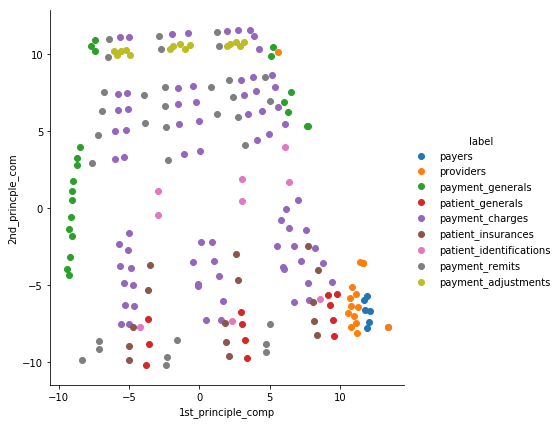

In [56]:
tsne_data_df = pd.DataFrame(tsne_data,columns=('1st_principle_comp','2nd_princple_com','label'))
sn.FacetGrid(tsne_data_df,hue='label',size=6).map(plt.scatter,'1st_principle_comp','2nd_princple_com').add_legend()
plt.show()